In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sem

#Set defaults
colors = ["red","green","blue","orange","blueviolet","gray","cyan","darkgoldenrod","darkorchid","deeppink"]
markers = ["o","v","^","<",">","8","s","*","D","+"]

In [2]:
#Read tumor data
tumor_file = "Pymaceuticals/data/clinicaltrial_data.csv"
tumor_data = pd.read_csv(tumor_file)            
tumor_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
#Read drug data
drug_file = "Pymaceuticals/data/mouse_drug_data.csv"
drug_data = pd.read_csv(drug_file)
drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
#Get unique lists for iteration
mouse_IDs = drug_data["Mouse ID"].unique()
num_mice = len(mouse_IDs)
print(f"{str(num_mice)} Mice:\n{mouse_IDs}")
drugs = drug_data["Drug"].unique()
num_drugs = len(drugs)
print(f"{str(num_drugs)} Drugs, including placebo:\n{drugs}")
timepoints = tumor_data["Timepoint"].unique()
num_timepoints = len(timepoints)
min_timepoint = timepoints.min()
max_timepoint = timepoints.max()
print(f"Minimum Timepoint: {min_timepoint}")
print(f"Maximum Timepoint: {max_timepoint}")
print(f"{str(num_timepoints)} Timepoints:\n{timepoints}")

249 Mice:
['f234' 'x402' 'a492' 'w540' 'v764' 'o848' 'z314' 'g989' 'm269' 'a963'
 't451' 'p981' 'k510' 'h333' 'c402' 'j984' 'w697' 's619' 'g867' 'k862'
 'i901' 'b879' 'p387' 'a366' 's565' 'j755' 'e213' 'e584' 'e291' 'z795'
 'x264' 'v199' 'r701' 't724' 'a818' 'v295' 'm133' 'l725' 'x336' 'l700'
 'n304' 'r604' 'v835' 'z969' 'o725' 'y601' 'x930' 'b559' 'z234' 'f993'
 'q119' 'n923' 'p189' 'h246' 'c819' 'a457' 'g107' 'f932' 'y260' 'k382'
 'c580' 'w422' 'm550' 'v289' 'm650' 'l264' 'o331' 'c832' 'o973' 'd474'
 'g497' 'f278' 'v603' 'u327' 'h428' 'b128' 'r944' 's185' 'w914' 'l897'
 'b742' 'f966' 'u364' 'j119' 'l509' 'm957' 'g316' 'r554' 'g288' 'y793'
 'i738' 's710' 'i557' 'v923' 'x401' 'm601' 'w150' 't565' 'r157' 'j246'
 'q132' 'i386' 'a251' 'z581' 'o809' 'k804' 'k483' 'y163' 'a577' 'v339'
 'c139' 'c326' 'v719' 'c895' 'f345' 'a203' 'w584' 'e476' 'w193' 'v766'
 's121' 'n671' 'm756' 'o813' 'a685' 'h531' 'w151' 'b447' 'u153' 'j296'
 'l661' 'y769' 'y865' 'l471' 'b759' 'l490' 'f436' 'l733' 'l558' 'x8

In [5]:
#Merge tumor and drug files
mice_data = tumor_data.merge(drug_data, on="Mouse ID")
mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


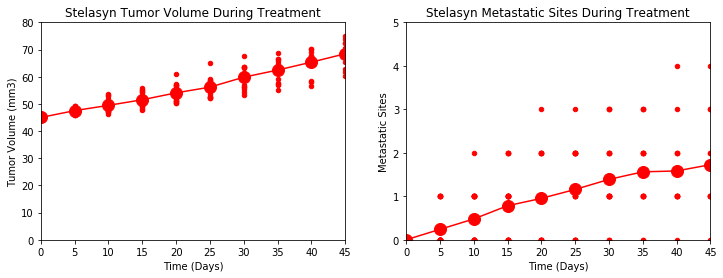

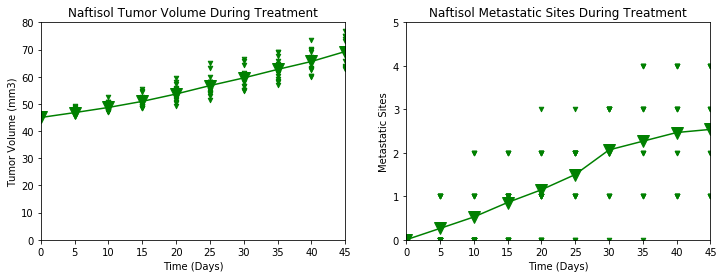

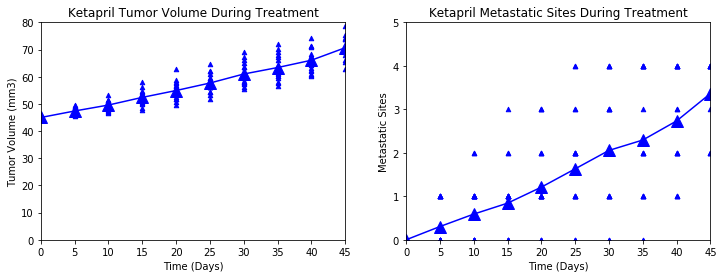

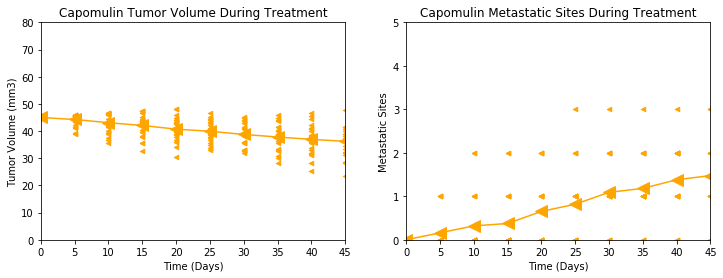

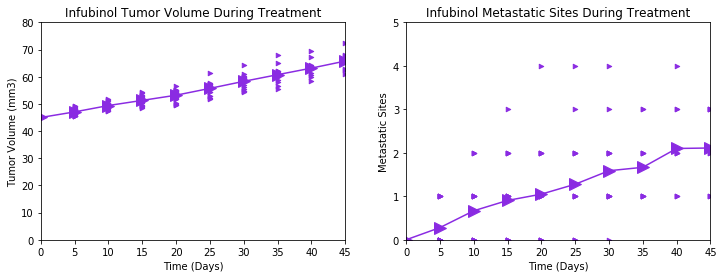

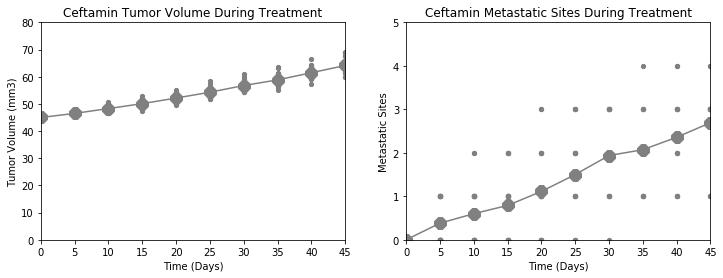

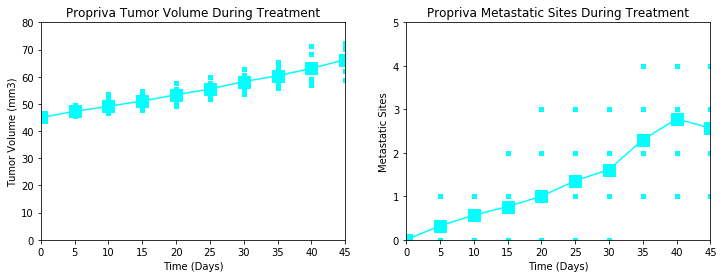

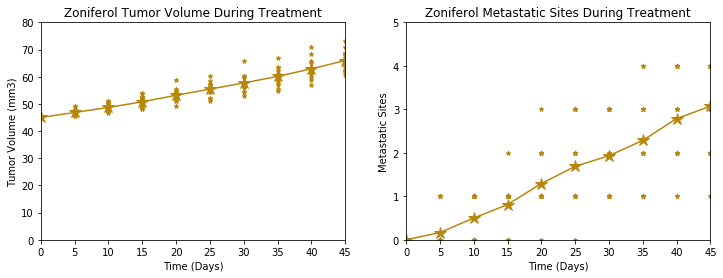

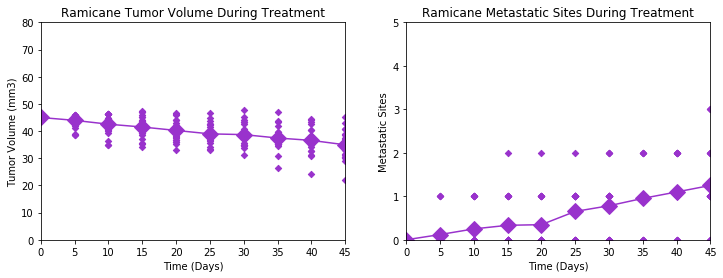

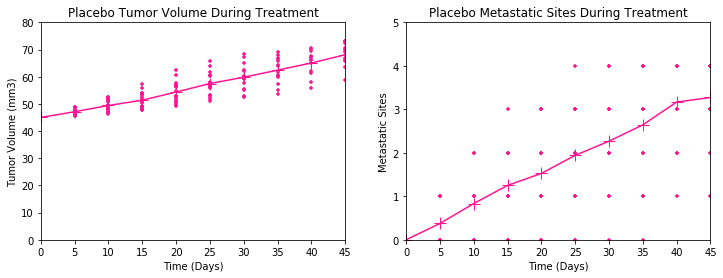

In [6]:
#Scatterplot and Mean Tumor size and Metastatic Sites Trend by Drug
visualization_index = 0
for drug in drugs:
    figs = plt.figure(figsize=(12,4))
    ax0 = figs.add_subplot(121)
    ax0.set_ylim([0,80])
    ax1 = figs.add_subplot(122)
    ax1.set_ylim([0,5])
    individual_points = mice_data.loc[mice_data["Drug"]==drug]
    tumor_line = individual_points.pivot_table(index="Timepoint",columns=["Drug"],values=["Tumor Volume (mm3)"],aggfunc='mean')
    meta_line = individual_points.pivot_table(index="Timepoint",columns=["Drug"],values=["Metastatic Sites"],aggfunc='mean')
    individual_points.plot.scatter(x='Timepoint',y='Tumor Volume (mm3)',c=colors[visualization_index],marker=markers[visualization_index],label=drug,title=f"{drug} Tumor Volume During Treatment",legend=False,ax=ax0)
    tumor_line.plot(c=colors[visualization_index],marker=markers[visualization_index],markersize=12,legend=False,ax=ax0)
    ax0.set_xlabel("Time (Days)")
    individual_points.plot.scatter(x='Timepoint',y='Metastatic Sites',c=colors[visualization_index],marker=markers[visualization_index],title=f"{drug} Metastatic Sites During Treatment",legend=False,label=drug,ax=ax1)
    meta_line.plot(c=colors[visualization_index],marker=markers[visualization_index],markersize=12,legend=False,ax=ax1)
    ax1.set_xlabel("Time (Days)")
    visualization_index += 1

In [7]:
#Mean Tumor Volume by Drug and Time
volume_grouping = ["Timepoint","Drug"]
vg = mice_data.groupby(volume_grouping).agg({"Tumor Volume (mm3)":"mean"})
vg.reset_index(level=0, inplace=True)
vg.reset_index(level=0, inplace=True)
vg.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.0
1,Ceftamin,0,45.0
2,Infubinol,0,45.0
3,Ketapril,0,45.0
4,Naftisol,0,45.0


In [8]:
#Pivot Tumor Volume by Drugs
volume_grouped = mice_data.pivot_table(index="Timepoint",columns=["Drug"],values=["Tumor Volume (mm3)"],aggfunc='mean')
volume_grouped.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [9]:
#Get Tumor Volume standard errors 
volume_errors = mice_data.pivot_table(index="Timepoint",columns=["Drug"],values=["Tumor Volume (mm3)"],aggfunc='sem')
volume_errors.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

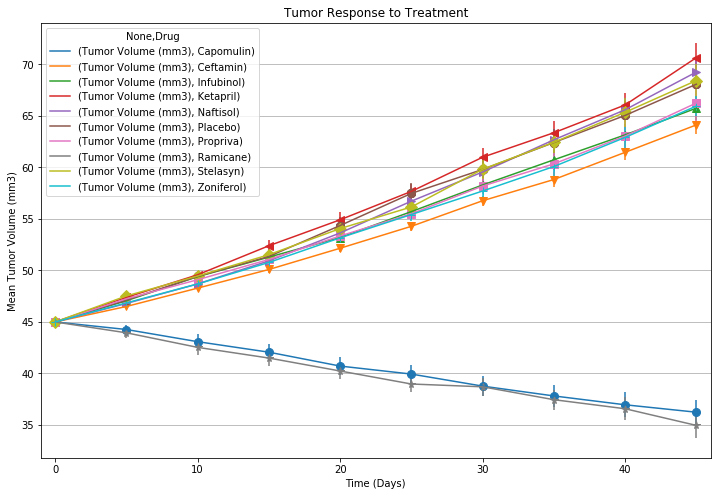

In [10]:
#Plot Mean Tumor Volume by Drug and Time with Standard Error Bars
ax_vol = volume_grouped.plot(figsize=(12,8),yerr=volume_errors)
ax_vol.set_prop_cycle(None)
volume_grouped.plot(figsize=(12,8),
                    title='Tumor Response to Treatment',
                    style=markers,
                    markersize=8,
                    legend = False,
                    ax=ax_vol)
ax_vol.grid(axis='y')
ax_vol.set_xlim(min_timepoint-1,max_timepoint+1)
ax_vol.set_xlabel("Time (Days)")
ax_vol.set_ylabel("Mean Tumor Volume (mm3)")
plt.show()

In [11]:
#Metastatic Response by Drugs
meta_grouped = mice_data.pivot_table(index="Timepoint",columns=["Drug"],values=["Metastatic Sites"],aggfunc='mean')
meta_grouped.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [12]:
#Metastatic Response by Drugs Standard Errors
meta_errors = mice_data.pivot_table(index="Timepoint",columns=["Drug"],values=["Metastatic Sites"],aggfunc='sem')
meta_errors.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

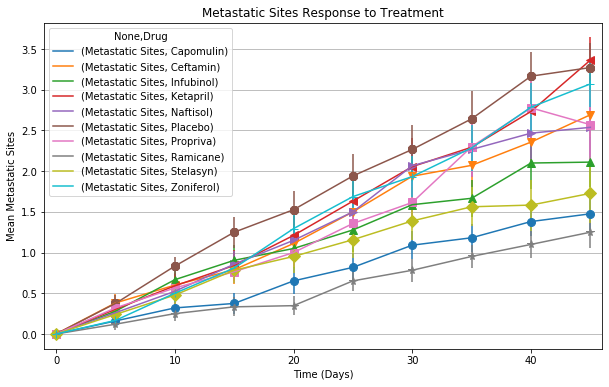

In [13]:
#Plot Metastatic Sites by Drug and Time with error bars
ax_meta = meta_grouped.plot(figsize=(10,6), yerr = meta_errors)
ax_meta.set_prop_cycle(None)
meta_grouped.plot(style=markers,
                  markersize=8,
                  title='Metastatic Sites Response to Treatment',
                  legend = False,
                  ax=ax_meta)
ax_meta.grid(axis='y')
ax_meta.set_xlim(min_timepoint-1,max_timepoint+1)
ax_meta.set_xlabel("Time (Days)")
ax_meta.set_ylabel("Mean Metastatic Sites")
plt.show()

In [14]:
#Calculate Survival Rates
count_mice = mice_data.copy()
count_mice = count_mice.rename(columns={"Mouse ID":"Mice"})

#Counting mice assigned drugs shows 25 mice per drug
drug_max_mice = drug_data.groupby(["Drug"]).agg({"Mouse ID":"count"})
drug_max_mice = drug_max_mice.rename(columns={"Mouse ID":"Mice"})
drug_max_mice

,Mice
Drug,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,25


In [15]:
#Counting mice in tumor data shows 25 mice per drug
tumor_mice = mice_data.groupby(["Drug","Mouse ID"]).agg({"Timepoint":"count"})
tumor_mice = tumor_mice.rename(columns={"Timepoint":"Tumor Checks"})
tumor_mice.reset_index(level=0, inplace=True)
tumor_mice.reset_index(level=0, inplace=True)
mice_per_drug = tumor_mice.groupby(["Drug"]).agg({"Mouse ID":"count","Tumor Checks":"sum"})
mice_per_drug

,Mouse ID,Tumor Checks
Drug,,
Capomulin,25,230
Ceftamin,25,178
Infubinol,25,178
Ketapril,25,188
Naftisol,25,186
Placebo,25,181
Propriva,25,161
Ramicane,25,228
Stelasyn,25,194


In [16]:
#The sample chart like starter file, indicates data needs to be cleaned
#because there is more than 1 timepoint value for some timepoints (maximum Mice should be <=25).
surviving_mice = count_mice.pivot_table(index="Timepoint",columns=["Drug"],values=["Mice"],aggfunc='count')
surviving_mice.head()

Mice                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [17]:
#Find Excess Timepoints
tumor_counts = mice_data.groupby(["Mouse ID","Drug","Timepoint"]).agg({"Metastatic Sites":"count"})
tumor_counts = tumor_counts.rename(columns={"Metastatic Sites":"Tumor Checks"})
tumor_counts.reset_index(level=0, inplace=True)
tumor_counts.reset_index(level=0, inplace=True)
tumor_counts["Tumor Checks"] = tumor_counts["Tumor Checks"].astype(int)
excess_counts = tumor_counts.loc[tumor_counts['Tumor Checks']>1]
excess_counts

,Drug,Mouse ID,Tumor Checks
Timepoint,,,
0,Propriva,g989,2
5,Propriva,g989,2
10,Propriva,g989,2
15,Propriva,g989,2
20,Propriva,g989,2
0,Stelasyn,g989,2
5,Stelasyn,g989,2
10,Stelasyn,g989,2
15,Stelasyn,g989,2


In [18]:
#Duplicate timepoints removed by grouping by Timepoint before counting mice
cleaned_mice_data = mice_data.groupby(["Timepoint","Drug","Mouse ID"]).agg({"Metastatic Sites":"count"})
cleaned_mice_data = cleaned_mice_data.rename(columns={"Metastatic Sites":"Count"})
cleaned_mice_data.reset_index(level=0, inplace=True)
cleaned_mice_data.reset_index(level=0, inplace=True)
cleaned_mice_data.reset_index(level=0, inplace=True)
cleaned_mice_data
cleaned_surviving_mice = cleaned_mice_data.pivot_table(index="Timepoint",columns=["Drug"],values=["Mouse ID"],aggfunc='count')
cleaned_surviving_mice = cleaned_surviving_mice.rename(columns={"Mouse ID":"Mice"})
cleaned_surviving_mice

Mice                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       25   
5                25       21        25       23       23      24       24   
10               25       20        21       22       21      24       22   
15               24       19        21       19       21      20       16   
20               23       18        20       19       20      19       16   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       25        25  
5               25       24        24  
10              24       22        22  
15              24       22        21  
20              23       20        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [19]:
#Get % Survival 
cleaned_mice_pct = cleaned_surviving_mice.copy()
cleaned_mice_pct["Mice"] = cleaned_mice_pct["Mice"].apply(lambda x: (100.0*x)/25.0)
cleaned_mice_pct

Mice                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0             100.0    100.0     100.0    100.0    100.0   100.0    100.0   
5             100.0     84.0     100.0     92.0     92.0    96.0     96.0   
10            100.0     80.0      84.0     88.0     84.0    96.0     88.0   
15             96.0     76.0      84.0     76.0     84.0    80.0     64.0   
20             92.0     72.0      80.0     76.0     80.0    76.0     64.0   
25             88.0     72.0      72.0     76.0     72.0    68.0     56.0   
30             88.0     64.0      68.0     72.0     60.0    60.0     52.0   
35             88.0     56.0      48.0     68.0     60.0    56.0     40.0   
40             84.0     56.0      40.0     60.0     60.0    48.0     36.0   
45             84.0     52.0      36.0     44.0     52.0    44.0     28.0   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0            100.0    100.0     100.0  
5            100.0     96.0      96.0  
10            96.0     88.0      88.0  
15            96.0     88.0      84.0  
20            92.0     80.0      68.0  
25            92.0     76.0      64.0  
30            92.0     72.0      60.0  
35            84.0     64.0      56.0  
40            80.0     48.0      56.0  
45            80.0     44.0      56.0

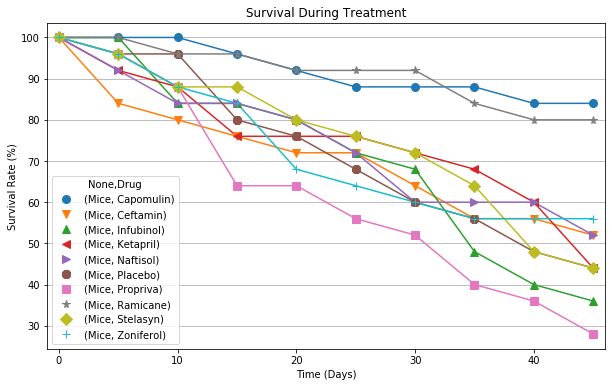

In [20]:
#Plot Survival Rate by Drug and Time with error bars
ax_sur = cleaned_mice_pct.plot(figsize=(10,6), legend = False)
ax_sur.set_prop_cycle(None)
cleaned_mice_pct.plot(figsize=(10,6), title='Survival During Treatment', style=markers, markersize=8, ax = ax_sur)
ax_sur.grid(axis='y')
ax_sur.set_xlim(min_timepoint-1,max_timepoint+1)
ax_sur.set_xlabel("Time (Days)")
ax_sur.set_ylabel("Survival Rate (%)")
plt.show()

In [21]:
volume_grouped

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [22]:
#Calculate Tumor Volume Change by Mouse
volume_change = []
for mouse in mouse_IDs:
    #Get Start Tumor Volume for mouse
    volume_start = tumor_data.loc[(tumor_data["Timepoint"]==0) & (tumor_data["Mouse ID"]==mouse)]["Tumor Volume (mm3)"].mean()
    #Find Last Tumor Volume for mouse
    time_index = 0
    current_volume = 0
    last_volume = 0
    volume_end = 0
    for timepoint in timepoints:
        current_volume = tumor_data.loc[(tumor_data["Timepoint"]==timepoint) & (tumor_data["Mouse ID"]==mouse)]["Tumor Volume (mm3)"].mean()
        if current_volume>0:
            last_volume = current_volume
        else:
            break
    volume_end = last_volume
    volume_difference = volume_end-volume_start
    volume_pct_difference = 100.0*volume_difference/volume_start
    volume_change.append({"Mouse ID":mouse,
                          "Start":volume_start,
                          "End":volume_end,
                          "Change":volume_difference,
                          "% Change":volume_pct_difference
                         })
mouse_tumor_change = pd.DataFrame(volume_change)
#Merge Tumor change and drugs
mouse_tumor_change = mouse_tumor_change.merge(drug_data, on="Mouse ID")
mouse_tumor_change.head()

,% Change,Change,End,Mouse ID,Start,Drug
0,28.330574,12.748758,57.748758,f234,45.0,Stelasyn
1,36.932458,16.619606,61.619606,x402,45.0,Stelasyn
2,33.604468,15.122011,60.122011,a492,45.0,Stelasyn
3,16.889488,7.600270,52.600270,w540,45.0,Stelasyn
4,9.805832,4.412624,49.412624,v764,45.0,Stelasyn


In [23]:
#Get Tumor Volume Change by Drug
drug_change = mouse_tumor_change.groupby("Drug").agg({"Change":["mean","min","max"],"% Change":["mean","min","max"]})
drug_change.columns = ["_".join(x) for x in drug_change.columns.ravel()]
drug_change = drug_change.rename(columns={'Change_mean':'Mean Change',
                        'Change_min':'Min Change',
                        'Change_max':'Max Change',
                        '% Change_mean':'Mean % Change',
                        '% Change_min':'Min % Change',
                        '% Change_max':'Max % Change'
                       })
drug_change = drug_change.sort_values('Mean % Change')
drug_change["Rounded % Change"] = round(drug_change["Mean % Change"],1)
shrunk = []
for index,row in drug_change.iterrows():
    outcome = "Pass" if row['Rounded % Change']<0 else "Fail"
    shrunk.append(outcome)
drug_change["Shrunk Tumor"] = shrunk
drug_change

,Mean Change,Min Change,Max Change,Mean % Change,Min % Change,Max % Change,Rounded % Change,Shrunk Tumor
Drug,,,,,,,,
Ramicane,-8.808610,-22.949874,0.220869,-19.574688,-50.999719,0.490820,-19.6,Pass
Capomulin,-8.332432,-21.656402,2.685963,-18.516516,-48.125338,5.968807,-18.5,Pass
Propriva,11.736964,0.000000,27.455421,26.082141,0.000000,61.012047,26.1,Fail
Ceftamin,12.753977,0.000000,23.923185,28.342171,0.000000,53.162632,28.3,Fail
Infubinol,13.699000,0.699331,27.226731,30.442222,1.554069,60.503846,30.4,Fail
Zoniferol,14.181258,0.000000,28.324432,31.513906,0.000000,62.943183,31.5,Fail
Placebo,15.508414,0.000000,28.212939,34.463143,0.000000,62.695419,34.5,Fail
Stelasyn,16.064474,0.000000,30.123690,35.698830,0.000000,66.941532,35.7,Fail
Naftisol,16.205757,0.000000,31.668817,36.012793,0.000000,70.375150,36.0,Fail


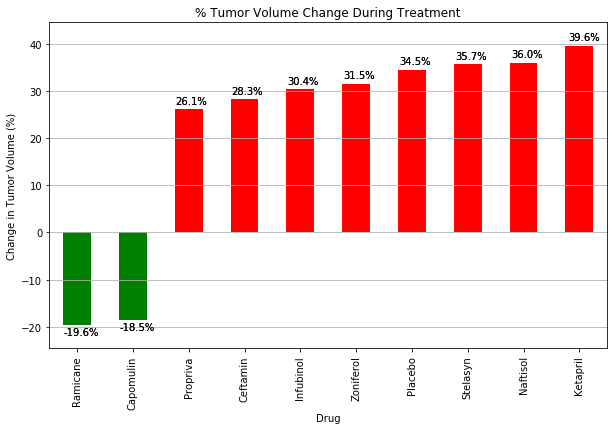

In [24]:
#Bar Chart of % Tumor Volume Change
drug_change_pct = drug_change.loc[:,["Rounded % Change","Shrunk Tumor"]]
max_drug_change_pct = drug_change["Rounded % Change"].max()
min_drug_change_pct = drug_change["Rounded % Change"].min()
ax_chg = drug_change_pct.plot(figsize=(10,10),kind='bar',legend = False)
ax_chg.set_prop_cycle(None)
drug_change_pct.plot(figsize=(10,6),
                     ylim=(min_drug_change_pct-5,max_drug_change_pct+5),
                     kind='bar',
                     stacked=True,
                     color=[np.where(drug_change_pct["Shrunk Tumor"]=="Pass",'g','r')],
                     title='% Tumor Volume Change During Treatment',
                     legend=False,ax=ax_chg)
ax_chg.grid(axis='y')
ax_chg.set_xlabel("Drug")
ax_chg.set_ylabel("Change in Tumor Volume (%)")
for bar in ax_chg.patches:
    label = bar.get_height()
    label_loc = 0
    if label>0:
        label_loc = label+1
    else:
        label_loc = label-2  
    ax_chg.annotate(str(f"{label}%"),(bar.get_x()*1.005,label_loc*1.005))
plt.show()

In [25]:
## Passing Drugs Statement
passing_drugs = drug_change.loc[drug_change_pct["Shrunk Tumor"]=="Pass"]
drug_names = passing_drugs.index
reducing_drugs = 0
reduced_tumor_drugs = "The drugs that reduced tumor size were "
for drug in drug_names:
    reducing_drugs+=1
    if reducing_drugs==1:
        reduced_tumor_drugs += drug
    elif reducing_drugs==len(drug_names):
        reduced_tumor_drugs += f", and {drug}."
    else:
        reduced_tumor_drugs += f", {drug}"
print(reduced_tumor_drugs)

The drugs that reduced tumor size were Ramicane, and Capomulin.


In [26]:
#Surviving Mice Statement
surviving_mice=cleaned_mice_data.loc[cleaned_mice_data["Timepoint"]==45]
num_surviving_mice = len(surviving_mice)
max_surviving = 0
max_surviving_drug = 0
for drug in range(0,num_drugs-1):
    current_surviving = cleaned_surviving_mice.iloc[num_timepoints-1,drug]
    if current_surviving>max_surviving:
        max_surviving = current_surviving
        max_surviving_drug = drug
print(f"{num_surviving_mice} of {str(num_mice)} mice ({round(100*num_surviving_mice/num_mice,1)}%) survived the experiment. {cleaned_surviving_mice.columns[max_surviving_drug][1]} had the most surviving mice, {str(max_surviving)} ({str(round(100*max_surviving/25,1))}%).")

130 of 249 mice (52.2%) survived the experiment. Capomulin had the most surviving mice, 21 (84.0%).


In [27]:
#Largest Tumor Statement
worst_change = drug_change["Max Change"].max()
worst_drug = drug_change.loc[drug_change["Max Change"]==worst_change]
worst_change_pct = round(drug_change.loc[drug_change["Max Change"]==worst_change]["Max % Change"][0],2)
print(f"{worst_drug.index[0]} had the largest tumor, {round(worst_change,2)} mm3 ({str(worst_change_pct)}% change).")

Ketapril had the largest tumor, 33.57 mm3 (74.59% change).
